# First Demo

This Demo will showcase the feature estimation and examplar analysis using simulated data.

## Import


In [4]:
import py_neuromodulation as py_nm

import numpy as np
from matplotlib import pyplot as plt

## Data Simulation

We will now generate some example data of 5 seconds, for 6 channels with a sample rate of 1kHz. 

In [45]:
def generate_random_walk(NUM_CHANNELS, TIME_DATA_SAMPLES):
    # from https://towardsdatascience.com/random-walks-with-python-8420981bc4bc
    dims = NUM_CHANNELS
    step_n = TIME_DATA_SAMPLES-1
    step_set = [-1, 0, 1]
    origin = (np.random.random([1,dims])-0.5)*1 # Simulate steps in 1D
    step_shape = (step_n,dims)
    steps = np.random.choice(a=step_set, size=step_shape)
    path = np.concatenate([origin, steps]).cumsum(0)
    return path.T

In [46]:
NUM_CHANNELS = 6
sfreq = 1000
TIME_DATA_SAMPLES = 5 * sfreq
data = generate_random_walk(NUM_CHANNELS, TIME_DATA_SAMPLES)
time = np.arange(0, TIME_DATA_SAMPLES/sfreq, 1/sfreq)

Text(0.5, 1.0, 'Example random walk data')

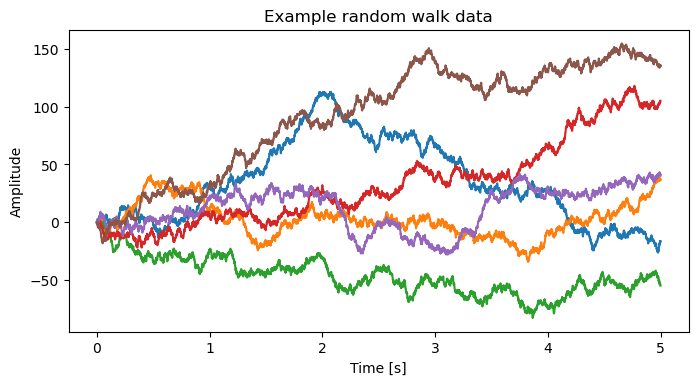

In [47]:
plt.figure(figsize=(8,4), dpi=100)
for ch_idx in range(data.shape[0]):
    plt.plot(time, data[ch_idx, :])
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Example random walk data")

## Py_neuromodulation setup

Now let's define the necessary setup files will be use for data preprocessing and feature estimation. 
Py_neuromodualtion is based on two parametrization files:
1. The *nm_channel* dataframe. This dataframe contains the columns

| Column name | Description |
| --- | --- | 
|**name** | name of the channel
|**rereference** | different channel name for bipolar rereferencing, or avereage for commono average rereferencing
|**used** | 0 or 1, channel selection 
|**target** | 0 or 1, for some decoding applications we can define target chanenls, e.g. EMG channels
|**type** | channel type according to the mne-python toolbox (https://mne.tools/stable/auto_tutorials/raw/10_raw_overview.html#sphx-glr-auto-tutorials-raw-10-raw-overview-py), e.g. ecog, eeg, ecg, emg, dbs, seeg etc.  
|**status** | good or bad, used for channel quality indication
|**new_name** | this keyword can be specified to indicate for example the used rereferncing scheme